# Josephson Junction Model
I will use this notebook to model Josephson junctions at DC and under AC current bias.

The central equations for Josephson junction circuit model as 
\begin{align*}
I(t) = I_c \sin{\phi} + \frac{V(t)}{R} \\
\hbar \frac{d \phi}{dt} = 2 e V(t)
\end{align*}
In these equations, $I(t)$ is assumed to be given and we intend to solve for $\phi(t),V(t)$. Using the second equation, we can eliminate $V(t)$ to get a first order ODE for $\phi(t)$.

$$ \frac{d \phi}{dt} = - \frac{2 e R}{\hbar} (I_c \sin{\phi} - I)$$

Introduce, timescale $\tau = \frac{\hbar}{2 e R I_c}$ and $\alpha(t) = \frac{I(t)}{I_c}$. The above equation simplifies to,

$$ \frac{d \phi}{dt} = -\frac{(\sin{\phi} - \alpha(t))}{\tau}$$

** The aim is to for a given current in the system i.e. $\alpha(t)$, to find $V(t)$. **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.integrate

## DC Bias
$$\alpha(t) = \alpha$$ where $\alpha$ is a fixed constant.

In [28]:
def rhs(y,t,alpha,tau):
    '''
        y : phi(t)
        t : time
        alpha : alpha is a function which gives alpha(t)
        tau : intrinsic timescale of the system as defined in the introduction
    '''
    return -(np.sin(y) - alpha(t))/tau

def alpha(t):
    '''
        returns the scaled current driven into the system
    '''
    return 1.2 

def calc_V(y_vec,t_vec):
    '''
        Returns the V(t) upto a constant, by differentiating y_vec
    '''
    dt = abs(t_vec[1] - t_vec[0])
    return np.gradient(y_vec,dt)

tau = 1.0
t_vec = np.linspace(0,100*tau,100)
y_0 = 0.0
results = scipy.integrate.odeint(rhs,y_0,t_vec,args=(alpha,tau)).flatten()

Text(0,0.5,'$\\phi$')

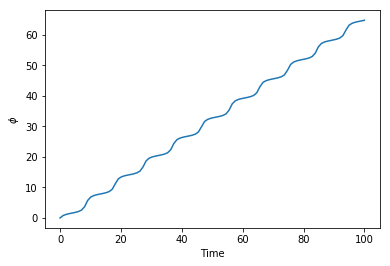

In [29]:
plt.plot(t_vec,results)
plt.xlabel("Time")
plt.ylabel(r"$\phi$")

Text(0,0.5,'V')

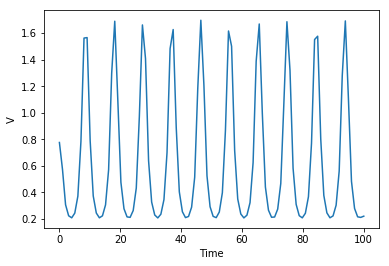

In [30]:
V_vec = calc_V(results,t_vec)
plt.plot(t_vec,V_vec)
plt.xlabel("Time")
plt.ylabel(r"V")

In [46]:
# study of I-V characteristics at different driving alpha
alpha_vec = np.linspace(0,3,100) 

tau = 1.0
t_vec = np.linspace(0,100*tau,100)
y_0 = 0.0

V_avg_vec = []
for alpha_val in alpha_vec:
    results = scipy.integrate.odeint(rhs,y_0,t_vec,args=(lambda x: alpha_val,tau)).flatten()
    V_vec = calc_V(results,t_vec)    
    V_avg = np.mean(V_vec)
    V_avg_vec.append(V_avg)

Text(0,0.5,'$<V>$')

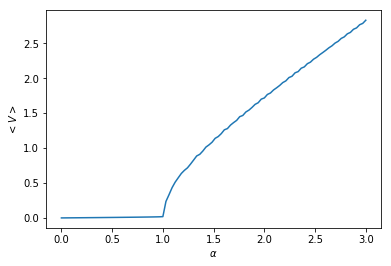

In [47]:
plt.plot(alpha_vec,V_avg_vec)
plt.xlabel(r"$\alpha$")
plt.ylabel("$<V>$")

## AC Bias
$$\alpha(t) = \alpha \sin{\omega t}$$ where $\alpha$ is a fixed constant.

In [110]:
# study of I-V characteristics at different driving alpha
alpha_vec = np.linspace(0,2,100) 

tau = 1.0
omega = 0.4
t_vec = np.linspace(0,100*tau,1000)
y_0 = 0.0

V_avg_vec = []
for alpha_val in alpha_vec:
    results = scipy.integrate.odeint(rhs,y_0,t_vec,args=(lambda x: alpha_val + 0.5*np.sin(omega*x),tau)).flatten()
    V_vec = calc_V(results,t_vec)    
    V_avg = np.mean(V_vec)
    V_avg_vec.append(V_avg)

Text(0,0.5,'$<V>$')

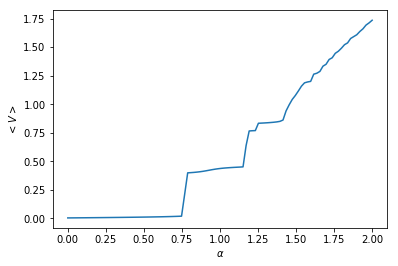

In [111]:
plt.plot(alpha_vec,V_avg_vec)
plt.xlabel(r"$\alpha$")
plt.ylabel("$<V>$")

In [112]:
# Shaprio steps with variable driving frequency, 2D map

alpha_vec = np.linspace(0,2,100) 
omega_vec = np.linspace(0,1,100)
tau = 1.0
t_vec = np.linspace(0,100*tau,1000)
y_0 = 0.0

V_avg_array = []
for omega in omega_vec:
    V_avg_vec = []
    for alpha_val in alpha_vec:
        results = scipy.integrate.odeint(rhs,y_0,t_vec,args=(lambda x: alpha_val + 0.5*np.sin(omega*x),tau)).flatten()
        V_vec = calc_V(results,t_vec)    
        V_avg = np.mean(V_vec)
        V_avg_vec.append(V_avg)
    V_avg_array.append(V_avg_vec)

Text(0,0.5,'$\\omega$')

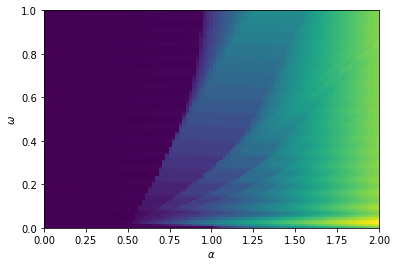

In [113]:
XX,YY = np.meshgrid(alpha_vec,omega_vec)
plt.pcolor(XX,YY,V_avg_array)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\omega$")

# Observations
- I could reproduce Shapiro steps.

- I created a map of Shapiro steps at variable driving frequencies.
